## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load data set

In [2]:
data = pd.read_csv("../data/data.csv", encoding = 'unicode_escape')

## Explore data

In [3]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## Renaming the columns

In [4]:
data.rename(columns = {'InvoiceNo':'Invoice_Num',
                       'StockCode':'Item_Code',
                       'Description':'Item_Description',
                       'Quantity':'Amount_Purchased',
                       'InvoiceDate':'Invoice_Date',
                       'UnitPrice':'Price_Per_Unit',
                       'CustomerID':'Customer_ID',
                       'Country':'Country'},
            inplace = True)

In [5]:
data.columns

Index(['Invoice_Num', 'Item_Code', 'Item_Description', 'Amount_Purchased',
       'Invoice_Date', 'Price_Per_Unit', 'Customer_ID', 'Country'],
      dtype='object')

## Top 10 and Last 10 rows of data set

In [6]:
data.head(10)

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [7]:
data.tail(10)

,Invoice_Num,Item_Code,Item_Description,Amount_Purchased,Invoice_Date,Price_Per_Unit,Customer_ID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## No data types to change to become usable

## Shape of dataframe

In [8]:
data.shape

(541909, 8)

## Item_Description and Customer_ID are missing values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
Invoice_Num         541909 non-null object
Item_Code           541909 non-null object
Item_Description    540455 non-null object
Amount_Purchased    541909 non-null int64
Invoice_Date        541909 non-null object
Price_Per_Unit      541909 non-null float64
Customer_ID         406829 non-null float64
Country             541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
data[pd.isna(data['Customer_ID']) == True].count()

Invoice_Num         135080
Item_Code           135080
Item_Description    133626
Amount_Purchased    135080
Invoice_Date        135080
Price_Per_Unit      135080
Customer_ID              0
Country             135080
dtype: int64

In [11]:
data[pd.isna(data['Customer_ID']) == False].count()

Invoice_Num         406829
Item_Code           406829
Item_Description    406829
Amount_Purchased    406829
Invoice_Date        406829
Price_Per_Unit      406829
Customer_ID         406829
Country             406829
dtype: int64

## Top 10 Customer IDs by Number of Orders

In [12]:
data['Customer_ID'].value_counts().head(10)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: Customer_ID, dtype: int64

## Top 10 Countries by Number of Orders

In [13]:
# This data makes sense since the data set is from a U.K. company
data['Country'].value_counts().head(10)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

## Top 10 Invoices by Count

In [14]:
data['Invoice_Num'].value_counts().head(10)

573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: Invoice_Num, dtype: int64

## Number of Unique Invoices

In [15]:
data['Invoice_Num'].nunique()

25900

## Top 10 Item (Codes) by Count

In [16]:
data['Item_Code'].value_counts().head(10)

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: Item_Code, dtype: int64

## Number of Unique Items

In [17]:
data['Item_Code'].nunique()

4070

## Top 10 Item Price by Count

In [19]:
data['Price_Per_Unit'].value_counts().head(10)

1.25    50496
1.65    38181
0.85    28497
2.95    27768
0.42    24533
4.95    19040
3.75    18600
2.10    17697
2.46    17091
2.08    17005
Name: Price_Per_Unit, dtype: int64

## Number of Unique Item Prices

In [20]:
data['Price_Per_Unit'].nunique()

1630

## Top 10 Invoice Dates by Count

In [23]:
data['Invoice_Date'].value_counts().head(10)

10/31/2011 14:41    1114
12/8/2011 9:28       749
12/9/2011 10:03      731
12/5/2011 17:24      721
6/29/2011 15:58      705
11/30/2011 15:13     687
12/8/2011 9:20       676
12/6/2010 16:57      675
12/5/2011 17:28      662
12/9/2010 14:09      652
Name: Invoice_Date, dtype: int64

## Number of Unique Invoice Dates

In [24]:
data['Invoice_Date'].nunique()

23260

## Basic statistics

In [18]:
data.describe()

,Amount_Purchased,Price_Per_Unit,Customer_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


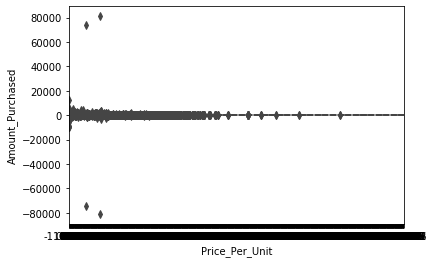

In [21]:
sns.boxplot(x = 'Price_Per_Unit', y = 'Amount_Purchased', data = data)

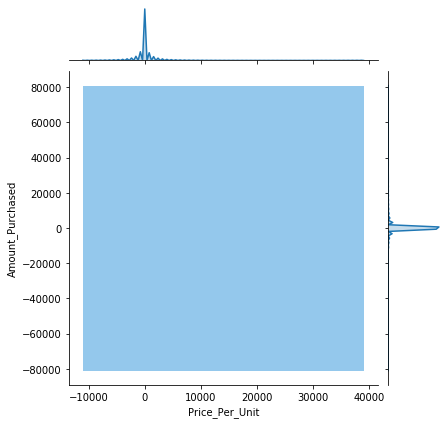

In [22]:
sns.jointplot(x = 'Price_Per_Unit', y = 'Amount_Purchased', data = data, kind = 'kde')